<a href="https://colab.research.google.com/github/Hack-it-Rafi/30_Days_Learning_Challenge/blob/main/hw4/linear-regression-exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [9]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
# Don't use scientific notation
options(digits = 3, scipen=999)

# Format plots with a white background and dark features.
theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
options(repr.plot.width=12, repr.plot.height=8)

cars = read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# peek at 10 random rows
sample_n(cars, 10)

Rows: 1286 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): type, make, model, trim
dbl (3): year, mileage, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,make,model,trim,mileage,price
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
USED,2011,Infiniti,G Sedan,G25 Journey,33505,20599
USED,2007,Audi,A4,2.0T,73805,11988
USED,2008,Honda,Accord,EX-L V-6,39029,16998
USED,2011,Infiniti,G Sedan,G37 Journey,32734,22995
USED,2012,BMW,3 Series,328i,57328,25888
USED,2006,Acura,MDX,Touring,90737,13981
USED,2009,Acura,TL,Base,43517,21998
USED,2013,BMW,3 Series,328i,47391,25887
USED,2013,Infiniti,G Sedan,G37 Journey,16396,26988


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [5]:
accords = cars |>
  filter(make == "Honda", model == "Accord")

model_accords = lm(price ~ mileage, data = accords)

summary(model_accords)


Call:
lm(formula = price ~ mileage, data = accords)

Residuals:
   Min     1Q Median     3Q    Max 
 -7528  -1330    -68   1226   7989 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 20675.6746   399.4744    51.8 <0.0000000000000002 ***
mileage        -0.0878     0.0047   -18.7 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2420 on 120 degrees of freedom
Multiple R-squared:  0.744,	Adjusted R-squared:  0.742 
F-statistic:  349 on 1 and 120 DF,  p-value: <0.0000000000000002



---

The value of $\hat{\beta}_0$ with units: 20675.67

Interpretation:

---

The value of $\hat{\beta}_1$ with units: -0.0878

Interpretation:

---

The value of $\text{se}({\hat{\beta}_0})$ with units: 399.4744

Interpretation:

---

The value of $\text{se}({\hat{\beta}_1})$ with units: 0.0047

Interpretation:

---

The value of $\hat{\sigma}$ with units: 2420

Interpretation:

---

The value of $\text{R}^2$ with units: 0.744

Interpretation:

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [10]:
# Create a new data frame for prediction
new_data_50k = data.frame(mileage = 50000)

# Get predictions and confidence intervals
predictions_50k = predict(model_accords, newdata = new_data_50k, interval = "confidence")

# Extract predicted mean and confidence interval
predicted_mean = predictions_50k[1, "fit"]
lower_bound = predictions_50k[1, "lwr"]
upper_bound = predictions_50k[1, "upr"]

# Print the results, formatted to two decimal places
cat(sprintf("Predicted average price for 50,000 miles: $%.2f\n", predicted_mean))
cat(sprintf("95%% Confidence Interval for the mean price: [$%.2f, $%.2f]\n", lower_bound, upper_bound))

Predicted average price for 50,000 miles: $16285.20
95% Confidence Interval for the mean price: [$15809.15, $16761.24]


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [11]:
# Create a new data frame for prediction with 300,000 miles
new_data_300k = data.frame(mileage = 300000)

# Get predictions and confidence intervals
predictions_300k = predict(model_accords, newdata = new_data_300k, interval = "confidence")

# Extract predicted mean and confidence interval
predicted_mean_300k = predictions_300k[1, "fit"]
lower_bound_300k = predictions_300k[1, "lwr"]
upper_bound_300k = predictions_300k[1, "upr"]

# Print the results, formatted to two decimal places
cat(sprintf("Predicted average price for 300,000 miles: $%.2f\n", predicted_mean_300k))
cat(sprintf("95%% Confidence Interval for the mean price: [$%.2f, $%.2f]\n", lower_bound_300k, upper_bound_300k))

Predicted average price for 300,000 miles: $-5667.20
95% Confidence Interval for the mean price: [$-7842.02, $-3492.38]


---

#Write your answer to Exercise 3 here.

The problem is that the model predicts a negative price for a car with a lot of miles. Cars can't be worth less than zero dollars, which shows our simple linear model doesn't work well for cars with very high mileage.

---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

`geom_smooth()` using formula = 'y ~ x'


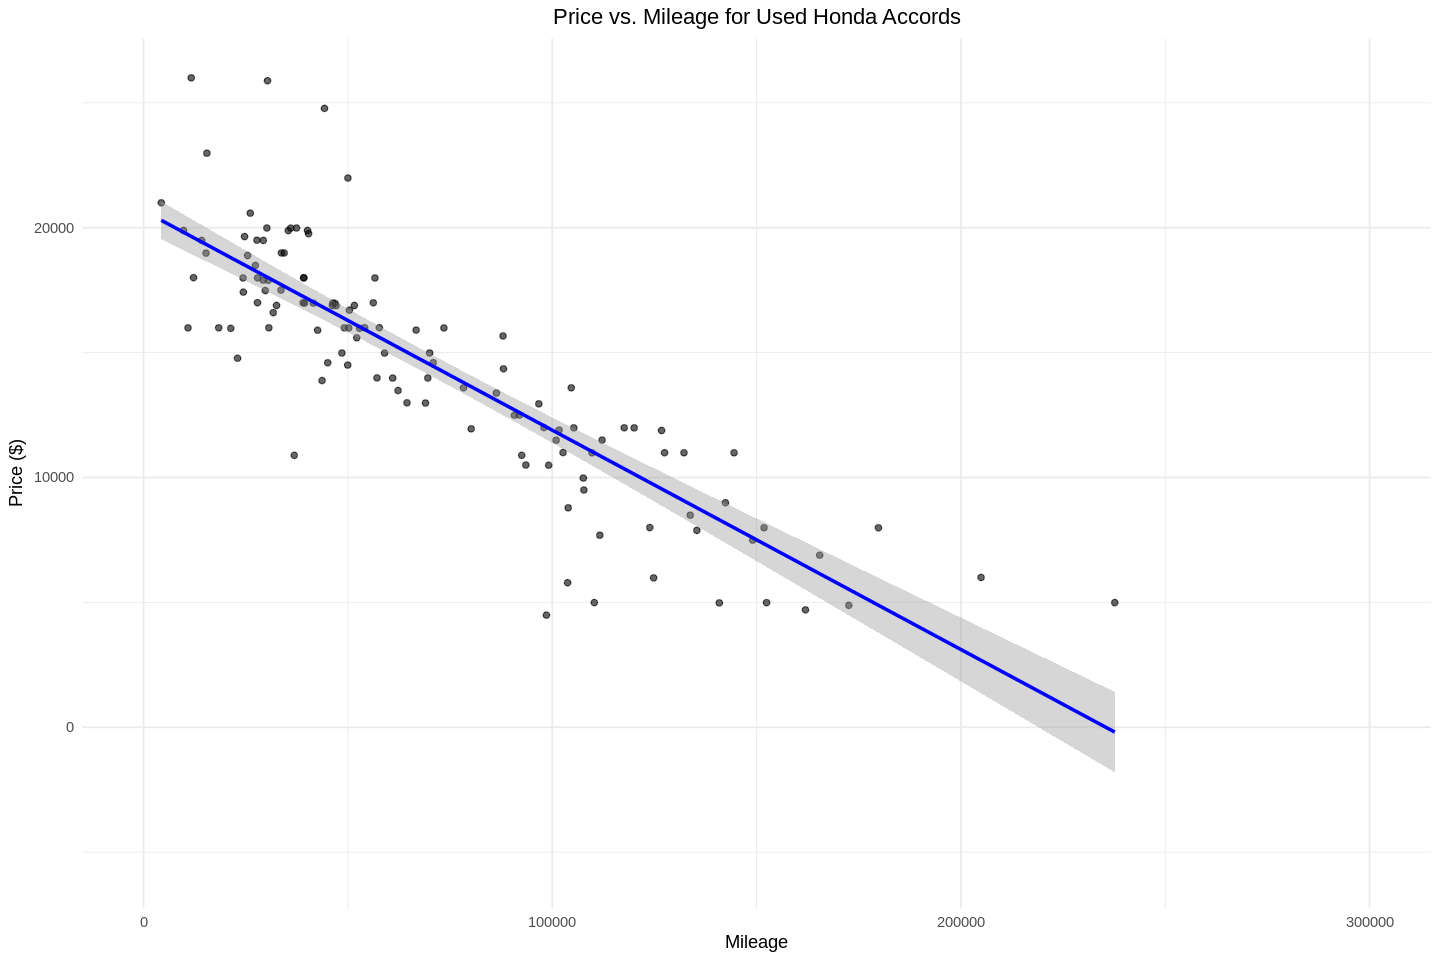

In [12]:

library(ggplot2)

ggplot(accords, aes(x = mileage, y = price)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Price vs. Mileage for Used Honda Accords",
       x = "Mileage",
       y = "Price ($)") +
  ylim(min(0, predict(model_accords, newdata = data.frame(mileage = 300000))), max(accords$price)) +
  xlim(0, max(300000, accords$mileage)) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [13]:

# Refit the model with log-transformed price as the outcome
model_accords_log = lm(log(price) ~ mileage, data = accords)

# Predict for 50,000 miles
new_data_50k = data.frame(mileage = 50000)
predictions_50k_log = predict(model_accords_log, newdata = new_data_50k, interval = "prediction")
predicted_price_50k = exp(predictions_50k_log[1, "fit"])

# Predict for 300,000 miles
new_data_300k = data.frame(mileage = 300000)
predictions_300k_log = predict(model_accords_log, newdata = new_data_300k, interval = "prediction")
predicted_price_300k = exp(predictions_300k_log[1, "fit"])

cat(sprintf("New predicted price for 50,000 miles: $%.2f\n", predicted_price_50k))
cat(sprintf("New predicted price for 300,000 miles: $%.2f\n", predicted_price_300k))

New predicted price for 50,000 miles: $15745.93
New predicted price for 300,000 miles: $2498.62


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

In [ ]:
# Your code here!



## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [ ]:
# Your code here!




---

The value of $\exp(\hat{\beta}_0)$ with units:

Interpretation:

---

The value of $\exp(\hat{\beta}_1)$ with units:

Interpretation:

---

The value of $\text{R}^2$ with units:

Interpretation:

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [ ]:
# Your code here!



---

Write your answer to Exercise 8 here.


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [ ]:
# Your code here!



---

Write your answer to Exercise 9 here.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [ ]:
# Your code here!



---

Write your answer to Exercise 10 here.


---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [ ]:
# Your code here!



---

Write your answer to Exercise 11 here.


---